In [1]:
import pandas as pd
from ipywidgets import widgets
from IPython.display import display
import numpy as np

In [2]:
import matplotlib.pyplot as plt
from cycler import cycler
from random import sample,seed
seed(12434)

default_cycler = cycler(linestyle=sample(['--', '-.'],2))
default_cycler = cycler(color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])

plt.rc('lines', linewidth=4)
plt.rc('axes', prop_cycle=default_cycler)

## Read CSV

In [3]:
# textWidget=widgets.Text()
# print('Enter a csv filename:')
# display(textWidget)

# df = None

# def handle_submit(sender):
#     global df
#     filename = textWidget.value
#     print("Reading {}".format(filename))

# textWidget.on_submit(handle_submit)

from glob import glob

fn = glob("*.csv")
df = pd.read_csv(fn[0])

df

,step,task,acc_pretrain_T0,acc_pretrain_T1,acc_pretrain_T2,acc_pretrain_T3,acc_pretrain_T4,acc_pretrain_T5,acc_pretrain_T6,acc_pretrain_T7,...,forget_conr50_sgd_0.01_T1,forget_conr50_sgd_0.01_T2,forget_conr50_sgd_0.01_T3,forget_conr50_sgd_0.01_T4,forget_conr50_sgd_0.01_T5,forget_conr50_sgd_0.01_T6,forget_conr50_sgd_0.01_T7,forget_conr50_sgd_0.01_T8,forget_conr50_sgd_0.01_T9,forget_avg_conr50_sgd_0.01
0,0,0,0.968,0.098,0.1,0.1,0.098,0.103,0.098,0.1,...,0.000,0.002,0.003,0.001,0.005,0.000,0.002,0.002,0.001,0.0016
1,1,0,0.968,0.098,0.1,0.1,0.098,0.103,0.098,0.1,...,0.000,0.002,0.003,0.001,0.005,0.000,0.002,0.002,0.001,0.0016
2,2,0,0.968,0.098,0.1,0.1,0.098,0.103,0.098,0.1,...,0.000,0.002,0.003,0.001,0.005,0.000,0.002,0.002,0.001,0.0016
3,3,0,0.968,0.098,0.1,0.1,0.098,0.103,0.098,0.1,...,0.000,0.002,0.003,0.001,0.005,0.000,0.002,0.002,0.001,0.0016
4,4,0,0.968,0.098,0.1,0.1,0.098,0.103,0.098,0.1,...,0.000,0.002,0.003,0.001,0.005,0.000,0.002,0.002,0.001,0.0016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1095,0,0.968,0.098,0.1,0.1,0.098,0.103,0.098,0.1,...,0.318,0.564,0.615,0.544,0.576,0.530,0.473,0.317,0.101,0.4051
1096,1096,0,0.968,0.098,0.1,0.1,0.098,0.103,0.098,0.1,...,0.318,0.564,0.615,0.544,0.576,0.530,0.473,0.317,0.101,0.4051
1097,1097,0,0.968,0.098,0.1,0.1,0.098,0.103,0.098,0.1,...,0.318,0.564,0.615,0.544,0.576,0.530,0.473,0.317,0.101,0.4051
1098,1098,0,0.968,0.098,0.1,0.1,0.098,0.103,0.098,0.1,...,0.318,0.564,0.615,0.544,0.576,0.530,0.473,0.317,0.101,0.4051


In [4]:

all_methods = ["catf", "conr1", "conr10", "conr25", "conr50", "drifta50", "2drifta50", "cont_conv", "drifta_conv", "2drifta_conv"]
lmethod     = ["\catf{}", "\conr[1]{}", "\conr[10]{}", "\conr[25]{}", "\conr[50]{}", "\driftadyn[50]{}", "\ddriftadyn[50]{}", "\conrconv", "\driftaconv", "\ddriftaconv"]

latex_method_name = {}

for k, method in enumerate(all_methods):
    latex_method_name[method]=lmethod[k]


methods = ["catf", "conr1", "conr10", "conr25", "conr50", "drifta" "2drifta", "cont_conv", "drifta_conv", "2drifta_conv"]
#methods = ["catf", "conr1", "conr10", "drifta", "2drifta"]
print(df.columns)

Index(['step', 'task', 'acc_pretrain_T0', 'acc_pretrain_T1', 'acc_pretrain_T2',
       'acc_pretrain_T3', 'acc_pretrain_T4', 'acc_pretrain_T5',
       'acc_pretrain_T6', 'acc_pretrain_T7',
       ...
       'forget_conr50_sgd_0.01_T1', 'forget_conr50_sgd_0.01_T2',
       'forget_conr50_sgd_0.01_T3', 'forget_conr50_sgd_0.01_T4',
       'forget_conr50_sgd_0.01_T5', 'forget_conr50_sgd_0.01_T6',
       'forget_conr50_sgd_0.01_T7', 'forget_conr50_sgd_0.01_T8',
       'forget_conr50_sgd_0.01_T9', 'forget_avg_conr50_sgd_0.01'],
      dtype='object', length=289)


## Compute times

In [5]:
# columns = []

# # for lr in [0.01]:
# #     for opt in ["sgd"]: 
# #         for method in ["drifta", "2drifta", "drifta_conv", "2drifta_conv"]:
# #             columns += ["times_{}_{}_{}".format(method, opt, lr)]

# for lr in [0.01]:
#     for opt in ["sgd"]: 
#         for method in ["2drifta1", "2drifta10", "2drifta25", "2drifta_conv", "2drifta"]:
#             columns += ["times_{}_{}_{}".format(method, opt, lr)]


# for lr in [0.01]:
#     for opt in ["sgd"]: 
#         for method in ["drifta1", "drifta10", "drifta25",  "drifta_conv", "drifta"]:
#             columns += ["times_{}_{}_{}".format(method, opt, lr)]
            
# for lr in [0.01]:
#     for opt in ["sgd"]: 
#         for method in [ "conr1", "conr10", "conr25", "conr50", "cont_conv"]:
#             columns += ["times_{}_{}_{}".format(method, opt, lr)]            
            
# times = df[columns].cumsum()
# times

## Plot times

In [6]:
#times.plot(figsize=(15,8),colormap="tab20", linewidth=4, alpha=0.7)

## Compute number of training batches

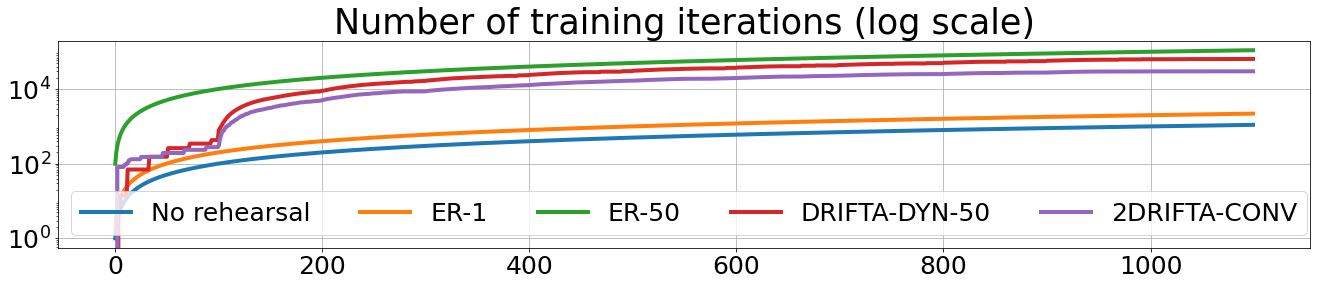

In [7]:
columns = []

for lr in [0.01]:
    for opt in ["sgd"]: 
        for method in [ "catf", "conr1", "conr50", "drifta50",  "2drifta_conv",]:
            columns += ["train_batches_{}_{}_{}".format(method, opt, lr)]
           

train_batches=df[columns].cumsum()

train_batches
px = 1/plt.rcParams['figure.dpi'] 
center=0
window=3000
train_batches.loc[(df["step"]>=center-window/2) & (df["step"]<=center+window/2)].plot(figsize=(2000*px,400*px), logy=True, linewidth=4, alpha=1)


name_map = \
{col:col.replace("train_batches_","").replace("_sgd_0.01","").upper().replace("CONR","ER-").replace("DRIFTA","DRIFTA-DYN-").replace("DRIFTA-DYN-_CONV", "DRIFTA-CONV")  for col in columns}



name_map["train_batches_catf_sgd_0.01"] = "No rehearsal"

#print(name_map)
plt.title('Number of training iterations (log scale)',fontsize=35, loc='center')
plt.legend(name_map.values(),ncol=5, fontsize=25)
plt.grid()
plt.tight_layout(pad=1.5)
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.yticks([1,100,10000])
plt.savefig("cifar10-exp3-buf500-train_batches.png")



## Plot average accuracy (on all tasks) per method

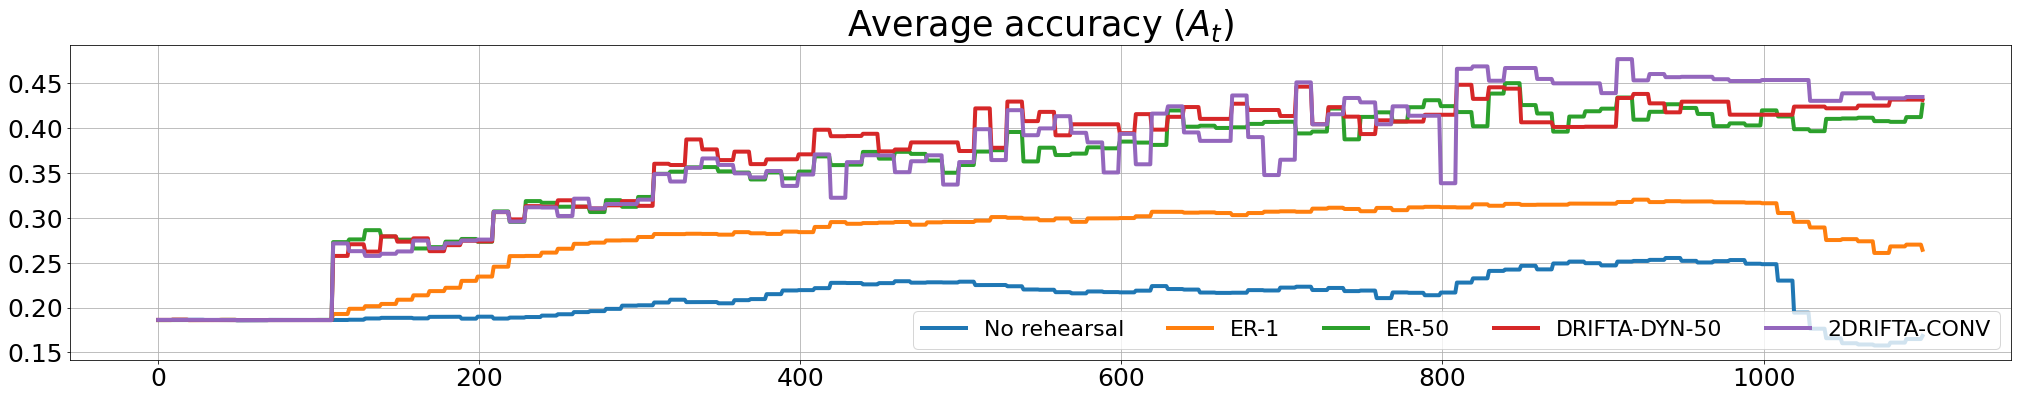

In [8]:
columns = []

for lr in [0.01]:
    for opt in ["sgd"]: 
        for method in [ "catf", "conr1", "conr50", "drifta50",  "2drifta_conv",]:
            columns += ["acc_avg_{}_{}_{}".format(method, opt, lr)]


center=0
window=3000
name_map = {col:col.replace("acc_avg_","").replace("_sgd_0.01","").upper().replace("CONR","ER-").replace("DRIFTA","DRIFTA-DYN-").replace("DRIFTA-DYN-_CONV", "DRIFTA-CONV")  for col in columns}
#print(name_map)
px = 1/plt.rcParams['figure.dpi'] 
#df[columns].plot(figsize=(2000*px,400*px), linewidth=4, alpha=1)

acc_avg = df[columns ]

acc_avg.plot(figsize=(2000*px,400*px), linewidth=4, alpha=1)

name_map["acc_avg_pretrain"]="Baseline"
name_map["acc_avg_catf_sgd_0.01"] = "No rehearsal"

plt.title('Average accuracy $(A_t)$',fontsize=35, loc='center')
plt.legend(name_map.values(),ncol=5, loc='lower right', fontsize=22)
plt.grid()
plt.tight_layout(pad=1.5)
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.savefig("cifar10-exp3-buf500-avg-acc.png")



## Zoom in an plot average accuracy up close

In [9]:
#center=400
#window=50
#df[columns + ["acc_avg_pretrain"]].loc[(df["step"]>=center-window/2) & (df["step"]<=center+window/2)].plot(figsize=(15,8),colormap="tab20", linewidth=4, alpha=0.7)


## Forgetting average 

In [10]:
#columns = []
#for opt in ["sgd", "adam"]: 
#    for method in methods:
#        columns += ["forget_avg_{}_{}_{}".format(method, opt, lr)]
#df[columns].plot(grid=True, figsize=(15,10))

## Zoom in on forgetting average

In [11]:
#center=1200
#window=250
#df[columns].loc[(df["step"]>=center-window/2) & (df["step"]<=center+window/2)].plot(figsize=(15,8),colormap="tab20", linewidth=4, alpha=0.7)

## Running accuracy (accuracy only on the current task)

{'acc_run_conr1_sgd_0.01': 'ER-1', 'acc_run_conr50_sgd_0.01': 'ER-50', 'acc_run_drifta50_sgd_0.01': 'DRIFTA-DYN-50', 'acc_run_2drifta_conv_sgd_0.01': '2DRIFTA-CONV'}


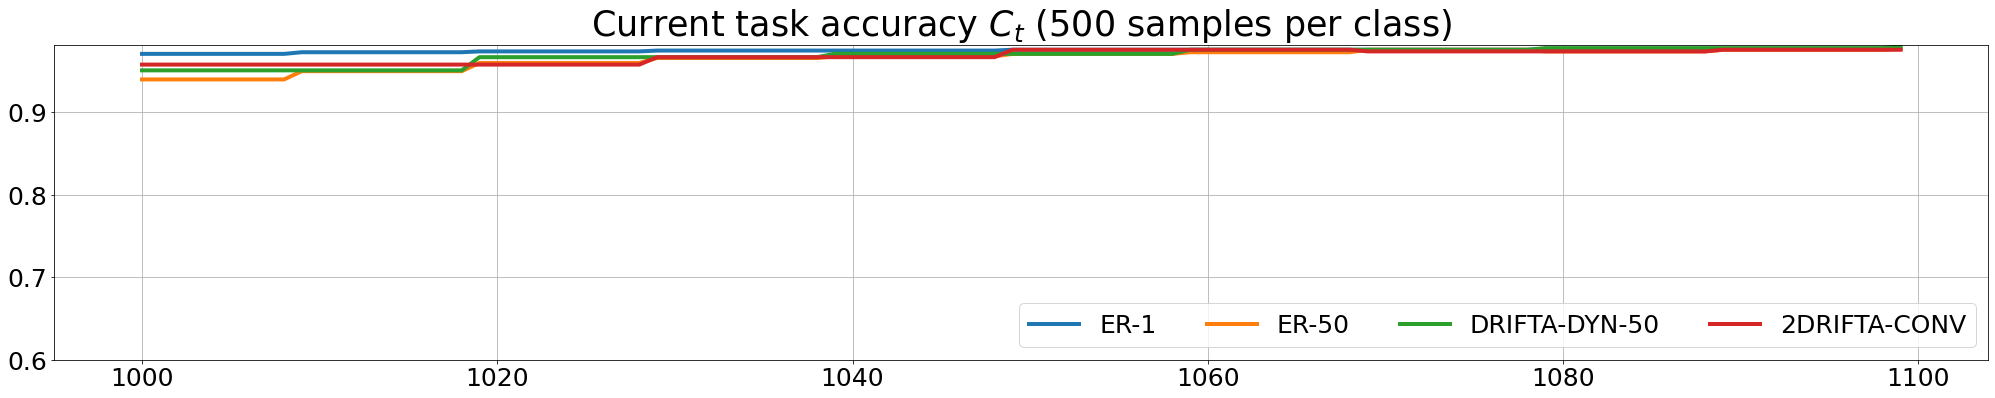

In [12]:
columns = []

for lr in [0.01]:
    for opt in ["sgd"]: 
      for method in ["conr1", "conr50", "drifta50", "2drifta_conv"]:
            mapper = lambda row: row['acc_{}_{}_{}_T{}'.format(method, opt, lr, int(row['task']))]
            column_name = 'acc_run_{}_{}_{}'.format(method, opt, lr)
            columns += [column_name]
            df[column_name] = df.apply(mapper, axis=1)
        

name_map = {col:col.replace("acc_run_","").replace("_sgd_0.01","").upper().replace("CONR","ER-").replace("DRIFTA","DRIFTA-DYN-").replace("DRIFTA-DYN-_CONV", "DRIFTA-CONV")  for col in columns}
print(name_map)

running_acc = df[columns].iloc[1000:1500]

#print(name_map)
px = 1/plt.rcParams['figure.dpi'] 

name_map["acc_run_catf_sgd_0.01"] = "No rehearsal"


center=0
window=3000
#running_acc.loc[(df["step"]>=center-window/2) & (df["step"]<=center+window/2)].plot(figsize=(2000*px,400*px), linewidth=4, alpha=1)
running_acc.plot(figsize=(2000*px,400*px), linewidth=4, alpha=1)


plt.title('Current task accuracy $C_t$ (500 samples per class)',fontsize=35, loc='center')
plt.legend(name_map.values(),ncol=4, fontsize=25,  loc='lower right')
plt.grid()
plt.tight_layout(pad=1.5)
plt.yticks([ 0.6, 0.7, 0.8, 0.9 ])
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.savefig("cifar10-exp3-buf500-running-acc.png")

# Zoom in on running accuracy

In [13]:
# center=100
# window=100
# running_acc.loc[(df["step"]>=center-window/2) & (df["step"]<=center+window/2)].plot(figsize=(15,8),colormap="tab20", linewidth=4, alpha=0.7)
#df.columns[20:50]
#df[["diff_X_t_drifta_conv_sgd_0.01", "detected_drift_drifta_conv_sgd_0.01"]].loc[(df["step"]>=center-window/2) & (df["step"]<=center+window/2)].plot(figsize=(15, 10))
#df[["detected_drift_drifta_conv_sgd_0.01"]].astype(int).loc[(df["step"]>=center-window/2) & (df["step"]<=center+window/2)].plot(figsize=(15, 10))
#df[["Z_t_drifta_conv_sgd_0.01"]].plot(figsize=(15, 10))
#df[["detected_drift_drifta_sgd_0.01"]].plot(figsize=(15, 10))

# Online Accuracy

{'online_acc_conr1_sgd_0.01': 'ER-1', 'online_acc_conr50_sgd_0.01': 'ER-50', 'online_acc_drifta50_sgd_0.01': 'DRIFTA-DYN-50', 'online_acc_2drifta_conv_sgd_0.01': '2DRIFTA-CONV', 'online_acc_catf_sgd_0.01': 'CATF'}


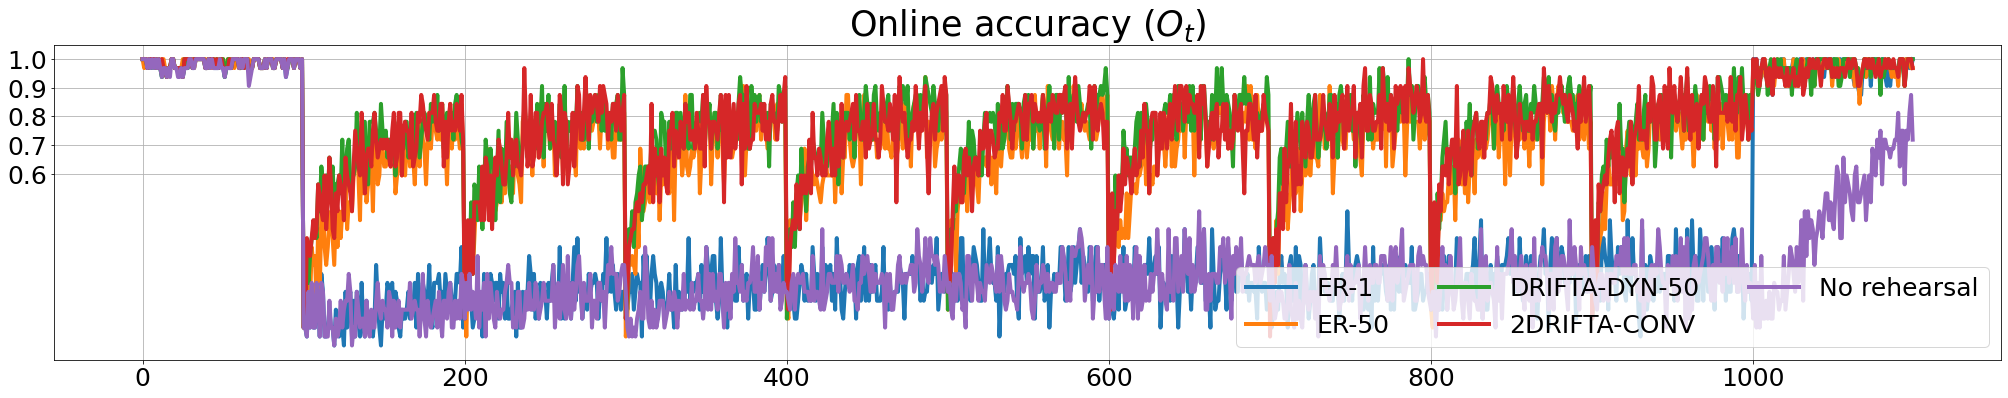

In [14]:
columns = []

for lr in [0.01]:
    for opt in ["sgd"]: 
        for method in ["conr1", "conr50", "drifta50", "2drifta_conv","catf"]:
            columns += ["online_acc_{}_{}_{}".format(method, opt, lr)]  

        
name_map = {col:col.replace("online_acc_","").replace("_sgd_0.01","").upper().replace("CONR","ER-").replace("DRIFTA","DRIFTA-DYN-").replace("DRIFTA-DYN-_CONV", "DRIFTA-CONV")  for col in columns}
print(name_map)

online_acc = df[columns]

#print(name_map)
px = 1/plt.rcParams['figure.dpi'] 

name_map["online_acc_catf_sgd_0.01"] = "No rehearsal"
center=0
window=3000
online_acc.loc[(df["step"]>=center-window/2) & (df["step"]<=center+window/2)].plot(figsize=(2000*px,400*px), linewidth=4, alpha=1)
plt.title('Online accuracy $(O_t)$',fontsize=35, loc='center')
plt.legend(name_map.values(),ncol=3, fontsize=25,  loc='lower right')
plt.grid()
plt.tight_layout(pad=1.5)
plt.yticks(fontsize=25)
plt.yticks([0.6, 0.7, 0.8, 0.9, 1])
plt.xticks(fontsize=25)
plt.savefig("cifar10-exp3-buf500-online-acc.png")


## Create tables

In [16]:
metrics = {}
_stats  = [\
          "train_batches", "acc_avg", "acc_run", "acc_run_0-500", "acc_run_1000-1500", "online_acc"]

lstats = [\
          "$N_{t}$", "$\\bar{A}$",  \
          "$\\bar{C}_{t}$",  \
          "$\\bar{C}_{0-500}$",  \
          "$\\bar{C}_{1000-1500}$",  \
          "$\\bar{O}_{t}$"]

LATEX_STATS = {s:ls for s,ls in zip(_stats,lstats)}

stats  = [\
          "train_batches", \
          "acc_avg", \
          "acc_run", \
          "acc_run_0-500", \
          "acc_run_1000-1500", \
          "online_acc"]

methods     =  ["catf", "conr1", "conr10", "conr25", "conr50", "drifta50", "2drifta50", "drifta_conv",  "2drifta_conv"]
lr      = [0.01]
opt     = ["sgd"]

################################################################################
columns = []
for llr in lr:
    for lopt in opt: 
        for method in methods:
            columns += ["train_batches_{}_{}_{}".format(method, lopt, llr)]

train_batches=df[columns].cumsum()
metrics['train_batches'] = df[columns].sum()
################################################################################







################################################################################
columns = []
for llr in lr:
    for lopt in opt: 
        for method in methods:
            columns += ["acc_avg_{}_{}_{}".format(method, lopt, llr)]



metrics['acc_avg'] = df[columns].mean()
################################################################################




################################################################################
columns = []
for llr in lr:
    for lopt in opt:
        for method in methods:
            mapper = lambda row: row['acc_{}_{}_{}_T{}'.format(method, lopt, llr, int(row['task']))]
            column_name = 'acc_run_{}_{}_{}'.format(method, lopt, llr)
            columns += [column_name]
            df[column_name] = df.apply(mapper, axis=1)

running_acc = df[columns]
metrics['acc_run'] = df[columns].mean()
metrics['acc_run_0-500'] = df[columns].iloc[:500].mean()
metrics['acc_run_1000-1500'] = df[columns].iloc[1000:1500].mean()
################################################################################




################################################################################
columns = []
for llr in lr:
    for lopt in opt:
        for method in methods:
            columns += ["online_acc_{}_{}_{}".format(method, lopt, llr)]

online_acc = df[columns]
metrics['online_acc'] = df[columns].mean()
################################################################################


print('\\begin{table}[hbt!]')
print('\\centering')
print('\\begin{tabular}')
print('{|l|c||c|||c||c|}')
print('\\hline')

ROWS = metrics['train_batches'].keys()

print(ROWS)

first_row = 'Method'
for stat in stats:
    first_row += ' & '+LATEX_STATS[stat]
print(first_row+"\\"+'\\')
for i, name in enumerate(ROWS):
    name = name.replace('train_batches_','').replace('_sgd_0.01', '')
    # print('{} & '.format(name), end=' ')
    print('{}'.format(latex_method_name[name]), end='')
    for stat in stats:
        res = metrics[stat].values[i]
        print(' & {}'.format(np.round(res, decimals=3)), end='')
    print("\\\\")
    print("\\hline\n")

print('\end{tabular}')
print('\end{table}')

print("\n\n\n\n")
header = ["Method"]
for stat in stats:
    header += [stat]
print(str(header).strip("[]").replace("\'","\""))
for i, name in enumerate(ROWS):
    name = name.replace('train_batches_','').replace('_sgd_0.01', '')
    # print('{} & '.format(name), end=' ')
    print('{} ='.format(name), end='')
    for j, stat in enumerate(stats):
        res = metrics[stat].values[i]
        if j==0:
            print('[ {}'.format(np.round(res, decimals=3)), end='')
        else:
            print(', {}'.format(np.round(res, decimals=3)), end='')      
    print(" ]")
    print("\n")


\begin{table}[hbt!]
\centering
\begin{tabular}
{|l|c||c|||c||c|}
\hline
Index(['train_batches_catf_sgd_0.01', 'train_batches_conr1_sgd_0.01',
       'train_batches_conr10_sgd_0.01', 'train_batches_conr25_sgd_0.01',
       'train_batches_conr50_sgd_0.01', 'train_batches_drifta50_sgd_0.01',
       'train_batches_2drifta50_sgd_0.01',
       'train_batches_drifta_conv_sgd_0.01',
       'train_batches_2drifta_conv_sgd_0.01'],
      dtype='object')
Method & $N_{t}$ & $\bar{A}$ & $\bar{C}_{t}$ & $\bar{C}_{0-500}$ & $\bar{C}_{1000-1500}$ & $\bar{O}_{t}$\\
\catf{} & 1100 & 0.212 & 0.294 & 0.331 & 0.427 & 0.298\\
\hline

\conr[1]{} & 2200 & 0.278 & 0.348 & 0.343 & 0.975 & 0.351\\
\hline

\conr[10]{} & 22000 & 0.333 & 0.589 & 0.548 & 0.968 & 0.596\\
\hline

\conr[25]{} & 55000 & 0.342 & 0.673 & 0.654 & 0.965 & 0.692\\
\hline

\conr[50]{} & 110000 & 0.355 & 0.702 & 0.691 & 0.966 & 0.726\\
\hline

\driftadyn[50]{} & 64240 & 0.364 & 0.753 & 0.737 & 0.969 & 0.783\\
\hline

\ddriftadyn[50]{} & 63682 &